In [401]:
import numpy as np
import pandas as pd

C_data = pd.read_csv("./c.csv", index_col = 0 )
java_data = pd.read_csv("./java.csv", index_col = 0 )
C_shop_data = pd.read_csv("./C#.csv", index_col = 0 )
Cpp_data = pd.read_csv("./c++.csv", index_col = 0 )
javascipt_data = pd.read_csv("./javascipt.csv", index_col = 0 )
PHP_data = pd.read_csv("./PHP.csv", index_col = 0 )
python_data = pd.read_csv("./python.csv", index_col = 0 )
SQL_data = pd.read_csv("./SQL.csv", index_col = 0 )
visualBasic_data = pd.read_csv("./비쥬얼베이직.csv", index_col = 0 )

# 문제3 각 언어별 출판물의 양으로 순위를 매겨주세요. 적절한 시각화를 사용하세요.

In [402]:
language_name = [
                 "C", "C#", "C++", "Python", "java", 
                 "javascript", "PHP", "SQL", "visualBasic"
                ]

language_book_sum = [
                     len(C_data), len(C_shop_data), len(Cpp_data), len(python_data), len(java_data),  
                     len(javascipt_data), len(PHP_data),  len(SQL_data),  len(visualBasic_data) 
                     ]

language_book_sum_df = pd.DataFrame({"언어":language_name, "총합":language_book_sum})
language_book_sum_df = language_book_sum_df.sort_values(by='총합' ,ascending=False)

# language_book_sum_df.set_index("언어", inplace=True)
language_book_sum_df

,언어,총합
3,Python,1747
4,java,1192
7,SQL,866
6,PHP,842
0,C,775
2,C++,712
1,C#,474
8,visualBasic,227
5,javascript,208


## 시각화를 진행하자

In [403]:
# matplotlib의 경우 한글폰트 깨짐현상을 방지하기 위한 코드
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

import seaborn as sns

C:\python\envs\book\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


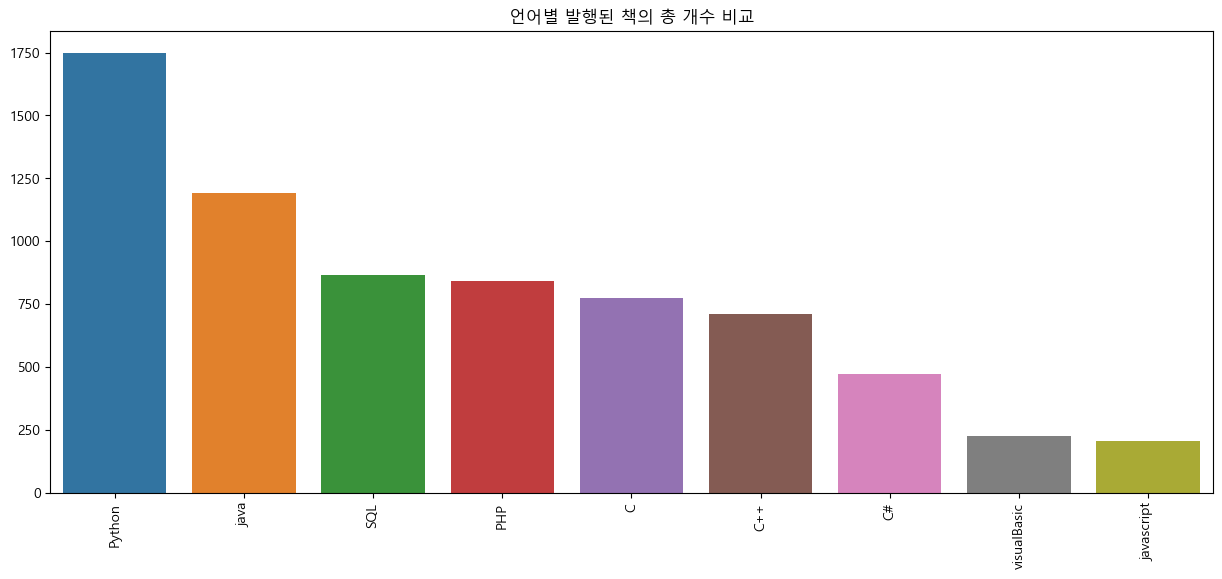

In [404]:
plt.subplots(figsize=(15,6))
sns.barplot(
    language_book_sum_df['언어'].values[ :9],
    language_book_sum_df['총합'].values[ : 9]
    )
plt.xticks(rotation=90)
plt.title('언어별 발행된 책의 총 개수 비교')
plt.show()

#### 결론
- 파이썬과 자바가 가장 많았으며, 한가지 주목할만한 점은 SQL과 PHP가 기본 중에 하나인 C와 C++보다 많다는 점이다.

# 문제4 수집된 정보를 기반으로 우리나라의 컴퓨터 언어 관련 출판사 순위를 확인해 주세요.

- concat으로 데이터를 이어붙인다
- 혹시 모르니 ISBN이 중복되는 책이 있는지 확인해보자.
- value count를 활용해서 출판사로 정렬하자.
- 그리고 시각화를 진행하자.

In [405]:
language_book_publisher = pd.concat([C_data, java_data, C_shop_data, Cpp_data,
                                    javascipt_data, PHP_data, python_data, 
                                     SQL_data, visualBasic_data  ])
language_book_publisher

,제목,저자,출판사,출판일,가격,ISBN
0,코딩 자율학습 나도코딩의 C 언어 입문 (C 언어의 완공을 돕는 프로그래밍 자습서),나도코딩,길벗,20221010.0,23400,9791140701551
1,혼자 공부하는 C 언어 (1:1 과외하듯 배우는 프로그래밍 자습서),서현우,한빛미디어,20190610.0,21600,9791162241868
2,C언어 Express (Visual Studio 2019),천인국,생능출판,20180820.0,27000,9788970509570
3,C언어,한광록,복두출판사,20150120.0,21780,9791185880976
4,C 언어,채현석,오성미디어,20100219.0,17000,9788992583701
...,...,...,...,...,...,...
22,Basic Cinematography: A Creative Guide to Visu...,NaN,Routledge,20190315.0,69770,9780815396451
23,Interdisciplinary Interaction Design: A Visual...,James Pannafino,Assiduous Publishing,20121101.0,19190,9780982634813
24,Basic Topics On Image Processing (OpenCV & Vis...,김용기,오메가북스,20210709.0,24300,9791197411601
25,Basic Cinematography (A Creative Guide to Visu...,NaN,Routledge,20190422.0,260080,9780815396444


In [406]:
language_book_publisher.drop_duplicates(['ISBN']).fillna("")

,제목,저자,출판사,출판일,가격,ISBN
0,코딩 자율학습 나도코딩의 C 언어 입문 (C 언어의 완공을 돕는 프로그래밍 자습서),나도코딩,길벗,20221010.0,23400,9791140701551
1,혼자 공부하는 C 언어 (1:1 과외하듯 배우는 프로그래밍 자습서),서현우,한빛미디어,20190610.0,21600,9791162241868
2,C언어 Express (Visual Studio 2019),천인국,생능출판,20180820.0,27000,9788970509570
3,C언어,한광록,복두출판사,20150120.0,21780,9791185880976
4,C 언어,채현석,오성미디어,20100219.0,17000,9788992583701
...,...,...,...,...,...,...
21,Basic Visual Formatting in CSS: Layout Fundame...,,O&#39;Reilly Media,20150827.0,14840,9781491929964
22,Basic Cinematography: A Creative Guide to Visu...,,Routledge,20190315.0,69770,9780815396451
23,Interdisciplinary Interaction Design: A Visual...,James Pannafino,Assiduous Publishing,20121101.0,19190,9780982634813
25,Basic Cinematography (A Creative Guide to Visu...,,Routledge,20190422.0,260080,9780815396444


- 데이터가 700개 가량 줄어들었다,. 그 이유가 뭘까?
- 데이터를 열어보면 책이름에 언어의 이름이 여러가지로 들어간 경우가 있다. 
- 지우기를 잘한듯
- 우선 여기까지 진행한 정보를 저장하자.

In [407]:
language_book_publisher.to_csv(
    "데이터총합.csv", sep=',', encoding="UTF-8"
)

In [408]:
language_book_publisher["출판사"].value_counts()

Packt Publishing                       556
PHP硏究所                                 527
에이콘출판                                  289
한빛미디어                                  274
Apress                                 226
                                      ... 
Infinity Science Pr Llc                  1
World Scientific Publishing Company      1
Mit Pr                                   1
Datasim Education                        1
Assiduous Publishing                     1
Name: 출판사, Length: 847, dtype: int64

- 약 800 곳의 출판사가 존재한다. 우리는 상위 10곳의 출판사만 확인해보도록하자

C:\python\envs\book\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


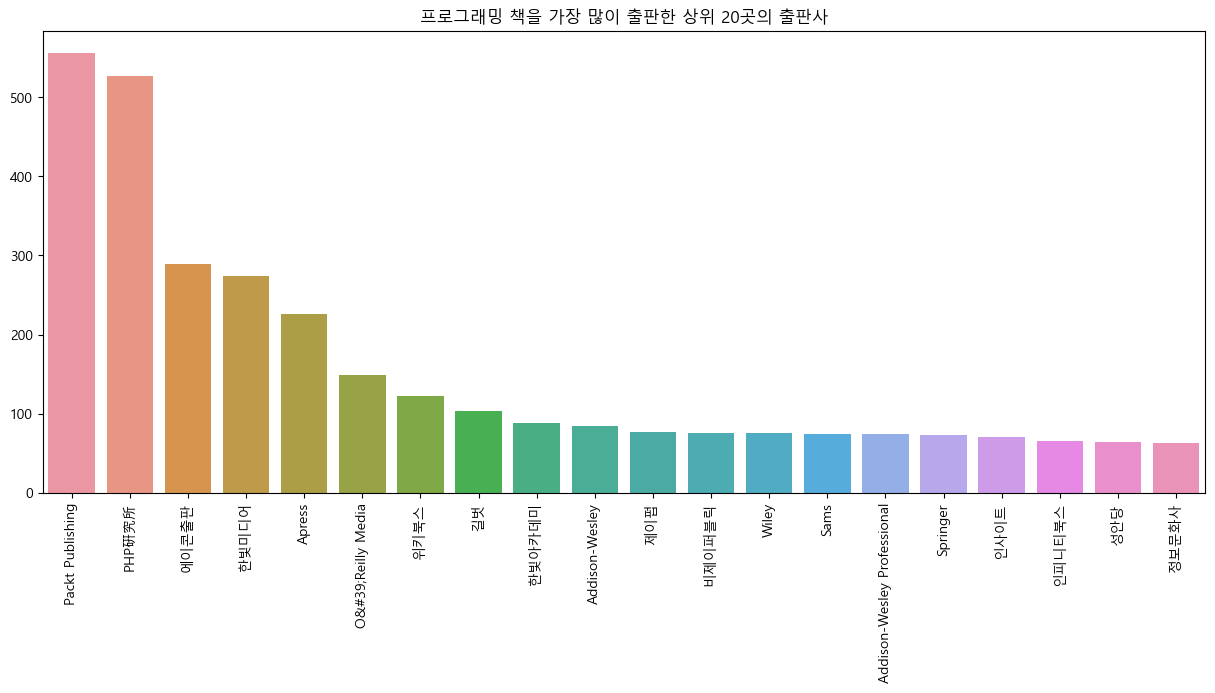

In [409]:
plt.subplots(figsize=(15,6))
sns.barplot(
    language_book_publisher['출판사'].value_counts().index[ :20],
    language_book_publisher['출판사'].value_counts().values[ : 20]
    )
plt.xticks(rotation=90)
plt.title('프로그래밍 책을 가장 많이 출판한 상위 20곳의 출판사')
plt.show()

- Parket Publishing의 경우 IT를 전문적으로 다루고 있으며, 해외출판사이고, 대부분 직수입책이다.
- PHP연구소는 일본의 출판사
- 우리나라 출판사 중에서는 에이콘출판사와 한빛미디어가 가장 많은 it책을 만들었다.

# 문제 4. 수집된 정보를 보면 우리나라 컴퓨터 관련 출판사의 순위를 확인해주세요.

- 이 문제는 검색으로 확인해야할 것 같다. 
- 외국출판사는 한글을 가지지 않는다. 이거로 전처리를 하면 영어로만된 한국 출판사가 제외될 수 있기 때문
- 상위 10개 출판사까지 알아보자.

In [410]:
language_book_publisher["출판사"].value_counts().head(20)

Packt Publishing               556
PHP硏究所                         527
에이콘출판                          289
한빛미디어                          274
Apress                         226
O&#39;Reilly Media             149
위키북스                           123
길벗                             103
한빛아카데미                          88
Addison-Wesley                  85
제이펍                             77
비제이퍼블릭                          76
Wiley                           76
Sams                            75
Addison-Wesley Professional     75
Springer                        73
인사이트                            71
인피니티북스                          65
성안당                             64
정보문화사                           63
Name: 출판사, dtype: int64

- 1위 : 에이콘출판사
- 2위 : 한빛미디어
- 3위 : 위키북스
- 4위 : 길벗
- 5위 : 한빛아카데미
- 6위 : 제이펍
- 7위 : 인사이트
- 8위 : 비제이퍼블릭
- 9위 : 성안당
- 10위 : 인피니티북스

# 문제5 수집된 정보에서 최근 2년간(20년, 21년)데이터와 그 전 (17년, 18년, 19년) 데이터를 비교해주세요.

- https://hleecaster.com/pandas-data-cleaning-2/


In [411]:
language_book_publisher.head()
language_book_publisher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제목      7043 non-null   object 
 1   저자      4963 non-null   object 
 2   출판사     7040 non-null   object 
 3   출판일     7027 non-null   float64
 4   가격      7043 non-null   int64  
 5   ISBN    7043 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 385.2+ KB


In [412]:
language_book_publisher['출판일'] = language_book_publisher['출판일'].astype(str)
language_book_publisher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      7043 non-null   object
 1   저자      4963 non-null   object
 2   출판사     7040 non-null   object
 3   출판일     7043 non-null   object
 4   가격      7043 non-null   int64 
 5   ISBN    7043 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 385.2+ KB


In [413]:
language_book_publisher.head()

,제목,저자,출판사,출판일,가격,ISBN
0,코딩 자율학습 나도코딩의 C 언어 입문 (C 언어의 완공을 돕는 프로그래밍 자습서),나도코딩,길벗,20221010.0,23400,9791140701551
1,혼자 공부하는 C 언어 (1:1 과외하듯 배우는 프로그래밍 자습서),서현우,한빛미디어,20190610.0,21600,9791162241868
2,C언어 Express (Visual Studio 2019),천인국,생능출판,20180820.0,27000,9788970509570
3,C언어,한광록,복두출판사,20150120.0,21780,9791185880976
4,C 언어,채현석,오성미디어,20100219.0,17000,9788992583701


In [414]:
language_book_publisher["연도"] = language_book_publisher["출판일"].str[:4]

In [415]:
language_book_publisher

,제목,저자,출판사,출판일,가격,ISBN,연도
0,코딩 자율학습 나도코딩의 C 언어 입문 (C 언어의 완공을 돕는 프로그래밍 자습서),나도코딩,길벗,20221010.0,23400,9791140701551,2022
1,혼자 공부하는 C 언어 (1:1 과외하듯 배우는 프로그래밍 자습서),서현우,한빛미디어,20190610.0,21600,9791162241868,2019
2,C언어 Express (Visual Studio 2019),천인국,생능출판,20180820.0,27000,9788970509570,2018
3,C언어,한광록,복두출판사,20150120.0,21780,9791185880976,2015
4,C 언어,채현석,오성미디어,20100219.0,17000,9788992583701,2010
...,...,...,...,...,...,...,...
22,Basic Cinematography: A Creative Guide to Visu...,NaN,Routledge,20190315.0,69770,9780815396451,2019
23,Interdisciplinary Interaction Design: A Visual...,James Pannafino,Assiduous Publishing,20121101.0,19190,9780982634813,2012
24,Basic Topics On Image Processing (OpenCV & Vis...,김용기,오메가북스,20210709.0,24300,9791197411601,2021
25,Basic Cinematography (A Creative Guide to Visu...,NaN,Routledge,20190422.0,260080,9780815396444,2019


- 데이터를 분리하는 연습을 해보면서 어떠한 작업을 할 수 있을지 고민했다.
- 문제에서 원하는 것은 언어의 트랜드가 어디로 이동했는가이다.
- 그러니 각 언어별로 연도열을 생성하고, 20,21년과 17,18,19년을 비교하자

In [416]:
language = [C_data, java_data, C_shop_data, Cpp_data,
                                    javascipt_data, PHP_data, python_data, 
                                     SQL_data, visualBasic_data  ]
for each in language:
    each['출판일'] = each['출판일'].astype(str)
    each["연도"] = each["출판일"].str[:4]
    each["개수"] = 1

In [461]:
C_data_pivot = C_data.pivot_table(C_data, index=["연도"], aggfunc = [np.sum] )
C_data_pivot.columns = ['/'.join(col) for col in C_data_pivot.columns]
del C_data_pivot["sum/가격"]
del C_data_pivot["sum/ISBN"]
C_data_pivot.rename(columns={C_data_pivot.columns[0]: "C언어"}, inplace=True)
C_data_pivot = C_data_pivot.tail(7) 
C_data_pivot = C_data_pivot.drop(["2016", "2022"])
C_data_pivot

,C언어
연도,
2017,43
2018,59
2019,43
2020,42
2021,42


In [463]:
java_data_pivot = java_data.pivot_table(java_data, index=["연도"], aggfunc = [np.sum] )
java_data_pivot.columns = ['/'.join(col) for col in java_data_pivot.columns]
del java_data_pivot["sum/가격"]
del java_data_pivot["sum/ISBN"]
java_data_pivot.rename(columns={java_data_pivot.columns[0]: "java"}, inplace=True)
java_data_pivot = java_data_pivot.tail(7)
java_data_pivot = java_data_pivot.drop(["nan", "2022"])
java_data_pivot

,java
연도,
2017,85
2018,92
2019,73
2020,50
2021,89


In [465]:
C_shop_data_pivot = C_shop_data.pivot_table(C_shop_data, index=["연도"], aggfunc = [np.sum] )
C_shop_data_pivot.columns = ['/'.join(col) for col in C_shop_data_pivot.columns]
del C_shop_data_pivot["sum/가격"]
del C_shop_data_pivot["sum/ISBN"]
C_shop_data_pivot.rename(columns={C_shop_data_pivot.columns[0]: "C#"}, inplace=True)
C_shop_data_pivot = C_shop_data_pivot.tail(7)
C_shop_data_pivot = C_shop_data_pivot.drop(["nan", "2022"])
C_shop_data_pivot

,C_shop
연도,
2017,25
2018,27
2019,32
2020,29
2021,59


In [467]:
Cpp_data_pivot = Cpp_data.pivot_table(Cpp_data, index=["연도"], aggfunc = [np.sum] )
Cpp_data_pivot.columns = ['/'.join(col) for col in Cpp_data_pivot.columns]
del Cpp_data_pivot["sum/가격"]
del Cpp_data_pivot["sum/ISBN"]
Cpp_data_pivot.rename(columns={Cpp_data_pivot.columns[0]: "C++"}, inplace=True)
Cpp_data_pivot = Cpp_data_pivot.tail(7)
Cpp_data_pivot = Cpp_data_pivot.drop(["nan", "2022"])
Cpp_data_pivot

,C++
연도,
2017,40
2018,43
2019,53
2020,42
2021,73


In [470]:
javascipt_data_pivot = javascipt_data.pivot_table(javascipt_data, index=["연도"], aggfunc = [np.sum] )
javascipt_data_pivot.columns = ['/'.join(col) for col in javascipt_data_pivot.columns]
del javascipt_data_pivot["sum/가격"]
del javascipt_data_pivot["sum/ISBN"]
javascipt_data_pivot.rename(columns={javascipt_data_pivot.columns[0]: "자바스크립트"}, inplace=True)
javascipt_data_pivot = javascipt_data_pivot.tail(6)
javascipt_data_pivot = javascipt_data_pivot.drop(["2022"])
javascipt_data_pivot

,자바스크립트
연도,
2017,16
2018,18
2019,11
2020,10
2021,17


In [472]:
PHP_data_pivot = PHP_data.pivot_table(PHP_data, index=["연도"], aggfunc = [np.sum] )
PHP_data_pivot.columns = ['/'.join(col) for col in PHP_data_pivot.columns]
del PHP_data_pivot["sum/가격"]
del PHP_data_pivot["sum/ISBN"]
PHP_data_pivot.rename(columns={PHP_data_pivot.columns[0]: "PHP"}, inplace=True)
PHP_data_pivot = PHP_data_pivot.tail(6)
PHP_data_pivot = PHP_data_pivot.drop(["2022"])
PHP_data_pivot

,PHP
연도,
2017,25
2018,23
2019,9
2020,14
2021,48


In [475]:
python_data_pivot = python_data.pivot_table(python_data, index=["연도"], aggfunc = [np.sum] )
python_data_pivot.columns = ['/'.join(col) for col in python_data_pivot.columns]
del python_data_pivot["sum/가격"]
del python_data_pivot["sum/ISBN"]
python_data_pivot.rename(columns={python_data_pivot.columns[0]: "파이썬"}, inplace=True)
python_data_pivot = python_data_pivot.tail(8)
python_data_pivot = python_data_pivot.drop(["nan", "2022", "2023"])
python_data_pivot

,파이썬
연도,
2017,140
2018,208
2019,249
2020,290
2021,286


In [477]:
SQL_data_pivot = C_data.pivot_table(SQL_data, index=["연도"], aggfunc = [np.sum] )
SQL_data_pivot.columns = ['/'.join(col) for col in SQL_data_pivot.columns]
del SQL_data_pivot["sum/가격"]
del SQL_data_pivot["sum/ISBN"]
SQL_data_pivot.rename(columns={SQL_data_pivot.columns[0]: "SQL"}, inplace=True)
SQL_data_pivot = SQL_data_pivot.tail(6)
SQL_data_pivot = SQL_data_pivot.drop(["2022"])
SQL_data_pivot

,SQL
연도,
2017,43
2018,59
2019,43
2020,42
2021,42


In [478]:
visualBasic_data_pivot = visualBasic_data.pivot_table(visualBasic_data, index=["연도"], aggfunc = [np.sum] )
visualBasic_data_pivot.columns = ['/'.join(col) for col in visualBasic_data_pivot.columns]
del visualBasic_data_pivot["sum/가격"]
del visualBasic_data_pivot["sum/ISBN"]
visualBasic_data_pivot.rename(columns={visualBasic_data_pivot.columns[0]: "visualBasic"}, inplace=True)
visualBasic_data_pivot = visualBasic_data_pivot.tail(6)
visualBasic_data_pivot = visualBasic_data_pivot.drop(["nan"])
visualBasic_data_pivot

,visualBasic
연도,
2016,8
2017,7
2019,6
2020,1
2021,27


## 언어별 5년간 출간된 책들의 개수를 가지는 데이터를 얻었다.
- 이를 가지고 분석을 하도록하자

In [488]:
language_17_21 = pd.concat([C_data_pivot, java_data_pivot, C_shop_data_pivot, Cpp_data_pivot,
                                    javascipt_data_pivot, PHP_data_pivot, python_data_pivot, 
                                     SQL_data_pivot, visualBasic_data_pivot], axis = 1)
language_17_21 = language_17_21.head(5).fillna(0)
language_17_21

,C언어,java,C_shop,C++,자바스크립트,PHP,파이썬,SQL,visualBasic
연도,,,,,,,,,
2017,43.0,85.0,25.0,40.0,16.0,25.0,140.0,43.0,7.0
2018,59.0,92.0,27.0,43.0,18.0,23.0,208.0,59.0,0.0
2019,43.0,73.0,32.0,53.0,11.0,9.0,249.0,43.0,6.0
2020,42.0,50.0,29.0,42.0,10.0,14.0,290.0,42.0,1.0
2021,42.0,89.0,59.0,73.0,17.0,48.0,286.0,42.0,27.0


In [489]:
language_17_21.to_csv(
    "language_17_21.csv", sep=',', encoding="UTF-8"
)

In [493]:
language_17_21

,C언어,java,C_shop,C++,자바스크립트,PHP,파이썬,SQL,visualBasic
연도,,,,,,,,,
2017,43.0,85.0,25.0,40.0,16.0,25.0,140.0,43.0,7.0
2018,59.0,92.0,27.0,43.0,18.0,23.0,208.0,59.0,0.0
2019,43.0,73.0,32.0,53.0,11.0,9.0,249.0,43.0,6.0
2020,42.0,50.0,29.0,42.0,10.0,14.0,290.0,42.0,1.0
2021,42.0,89.0,59.0,73.0,17.0,48.0,286.0,42.0,27.0


In [494]:
language_17_19 = language_17_21.drop(["2020", "2021"])
language_17_19

,C언어,java,C_shop,C++,자바스크립트,PHP,파이썬,SQL,visualBasic
연도,,,,,,,,,
2017,43.0,85.0,25.0,40.0,16.0,25.0,140.0,43.0,7.0
2018,59.0,92.0,27.0,43.0,18.0,23.0,208.0,59.0,0.0
2019,43.0,73.0,32.0,53.0,11.0,9.0,249.0,43.0,6.0


In [508]:
language_17_19_mean = pd.DataFrame(language_17_19.mean())
language_17_19_mean.rename(columns={language_17_19_mean.columns[0]: "평균"}, inplace=True)
language_17_19_mean = language_17_19_mean.sort_values(by='평균' ,ascending=False)
language_17_19_mean

,평균
파이썬,199.000000
java,83.333333
C언어,48.333333
SQL,48.333333
C++,45.333333
C_shop,28.000000
PHP,19.000000
자바스크립트,15.000000
visualBasic,4.333333


In [509]:
language_20_21 = language_17_21.drop(["2017", "2018", "2019"])
language_20_21

,C언어,java,C_shop,C++,자바스크립트,PHP,파이썬,SQL,visualBasic
연도,,,,,,,,,
2020,42.0,50.0,29.0,42.0,10.0,14.0,290.0,42.0,1.0
2021,42.0,89.0,59.0,73.0,17.0,48.0,286.0,42.0,27.0


In [511]:
language_20_21_mean = pd.DataFrame(language_20_21.mean())
language_20_21_mean.rename(columns={language_20_21_mean.columns[0]: "평균"}, inplace=True)
language_20_21_mean = language_20_21_mean.sort_values(by='평균' ,ascending=False)
language_20_21_mean

,평균
파이썬,288.0
java,69.5
C++,57.5
C_shop,44.0
C언어,42.0
SQL,42.0
PHP,31.0
visualBasic,14.0
자바스크립트,13.5


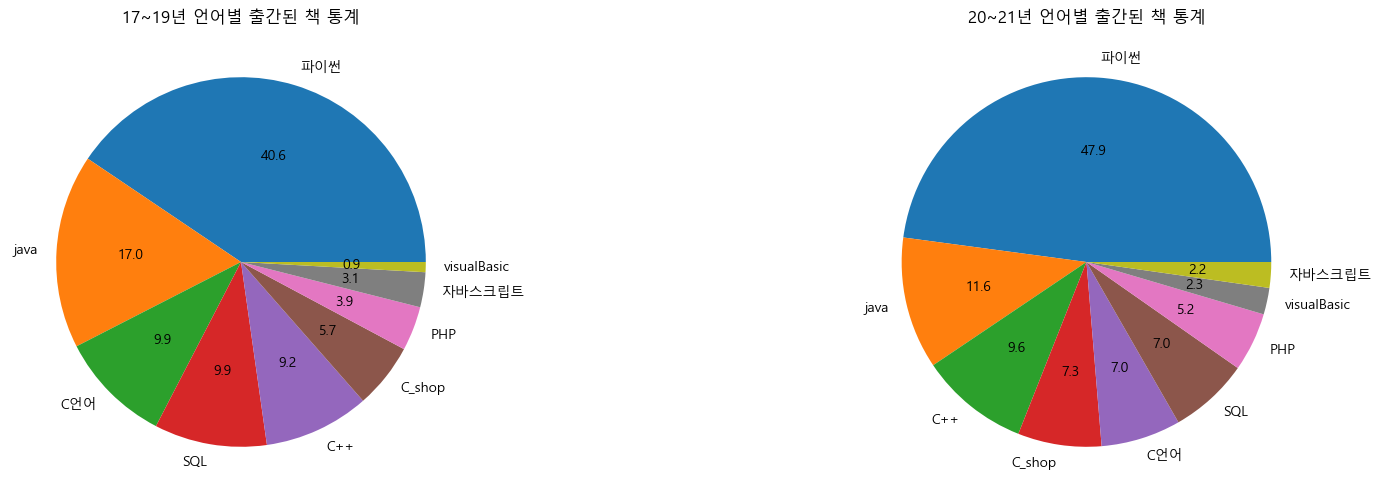

In [512]:
# 대한민국 범죄율 pdf에서 가져온 원 그래프를 그려 테러횟수, 부상자, 사망자를 보여준다.
f, ax = plt.subplots(1,2, figsize=(20,6))

language_17_19_mean['평균'].plot.pie(ax= ax[0], autopct = "%.1f")
ax[0].set_title('17~19년 언어별 출간된 책 통계') 
ax[0].set_ylabel('')

language_20_21_mean['평균'].plot.pie( ax= ax[1], autopct = "%.1f")
ax[1].set_title('20~21년 언어별 출간된 책 통계') 
ax[1].set_ylabel('')

plt.show()

#### 결론
- 파이썬의 비중이 20~21년 40%에서 약 50%정도로 늘어났다.
- 자바의 경우 17%에서 11.6%정도로 감소하였지만 여전히 2등이다.
- C언어와 C++의 자리가 바뀌었다.
- SQL의 순위가 3위에서 5위로 내려갔다.